# California analysis in depth

In [1]:
library(readr)
library(dplyr)
library(ggplot2)
dataa<-read_csv("OnlineArrestData1980-2018.csv")
datayear<-read_csv("byyearcal.csv")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Parsed with column specification:
cols(
  YEAR = col_double(),
  GENDER = col_character(),
  RACE = col_character(),
  AGE_GROUP = col_character(),
  COUNTY = col_character(),
  VIOLENT = col_double(),
  PROPERTY = col_double(),
  F_DRUGOFF = col_double(),
  F_SEXOFF = col_double(),
  F_ALLOTHER = col_double(),
  F_TOTAL = col_double(),
  M_TOTAL = col_double(),
  S_TOTAL = col_double()
)
Parsed with column specification:
cols(
  year = col_double(),
  M_TOTAL = col_double(),
  F_TOTAL = col_double()
)


In [2]:
datap<-filter(dataa,dataa$YEAR>=2011)
head(datap)

YEAR,GENDER,RACE,AGE_GROUP,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2011,Male,Black,Under 18,Alameda County,243,291,45,19,107,705,449,81
2011,Male,Black,Under 18,Butte County,7,10,1,0,1,19,41,0
2011,Male,Black,Under 18,Calaveras County,0,0,0,0,0,0,1,0
2011,Male,Black,Under 18,Colusa County,0,0,0,0,0,0,1,0
2011,Male,Black,Under 18,Contra Costa County,125,130,24,5,49,333,358,47
2011,Male,Black,Under 18,El Dorado County,1,3,0,0,0,4,4,0


In [3]:
datapn<-datap %>% group_by(YEAR)
datapnyear<-datapn %>% summarise(totalm = sum(M_TOTAL),totalf = sum(F_TOTAL))
head(datapnyear)

YEAR,totalm,totalf
<dbl>,<dbl>,<dbl>
2011,825455,419914
2012,792297,429807
2013,750985,442741
2014,762006,439958
2015,835370,314748
2016,804568,308860


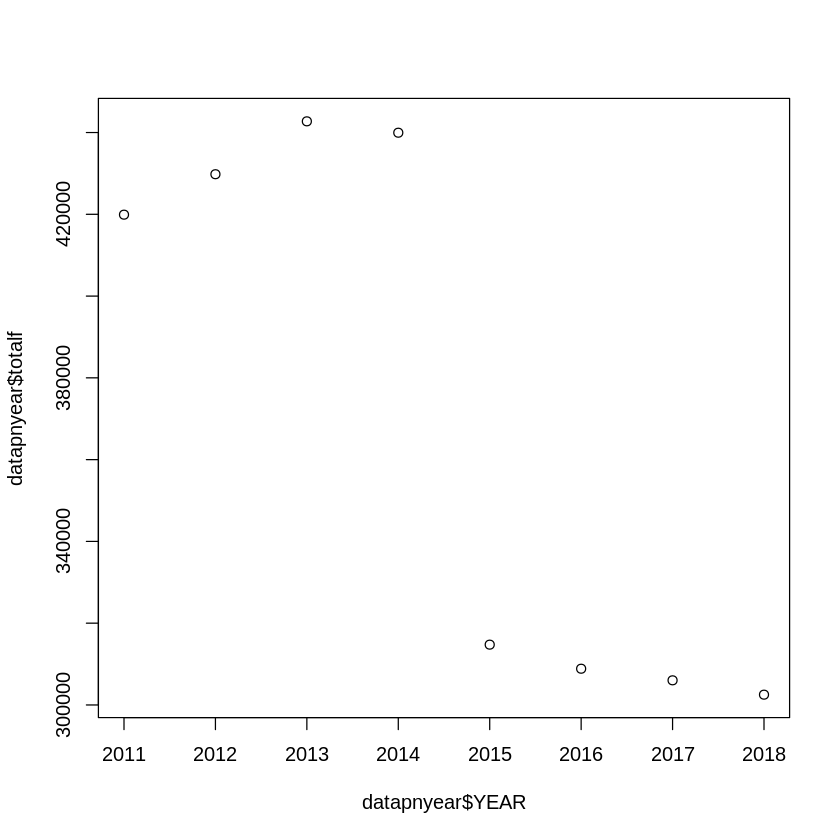

In [4]:
plot1<-plot(datapnyear$YEAR,datapnyear$totalf)

In [5]:
datapn_before<-filter(datapnyear,YEAR<=2014&YEAR>=2011)
datapn_after<-filter(datapnyear,YEAR>2014)
lm0<-lm(datapn_before$totalm~datapn_before$YEAR)
lm01<-lm(datapn_after$totalm~datapn_after$YEAR)
lm1<-lm(datapn_before$totalf~datapn_before$YEAR)
lm11<-lm(datapn_after$totalf~datapn_after$YEAR)

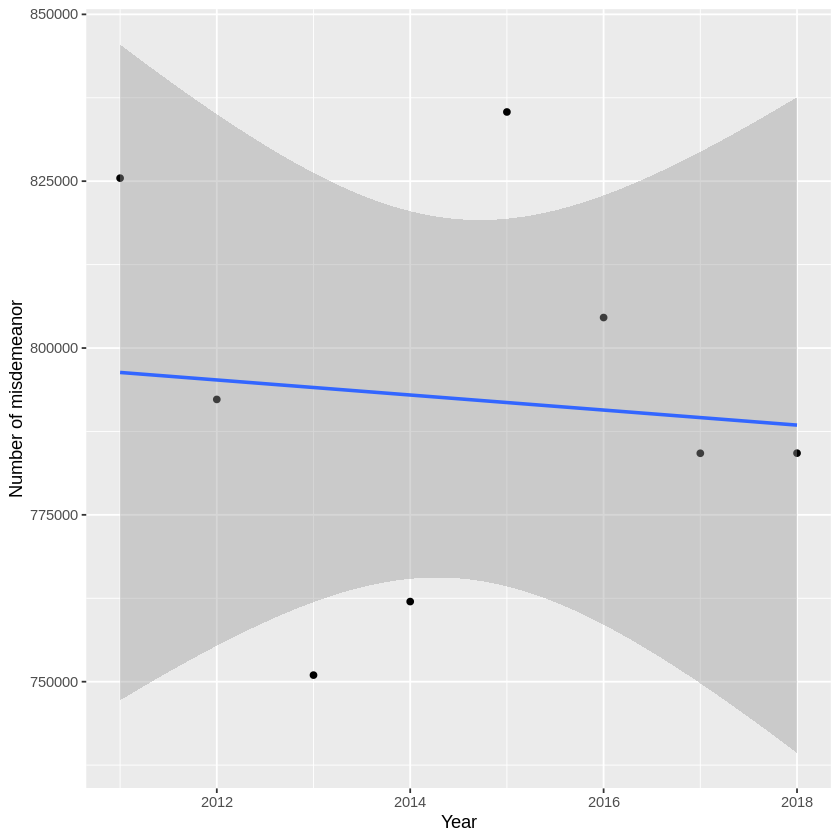

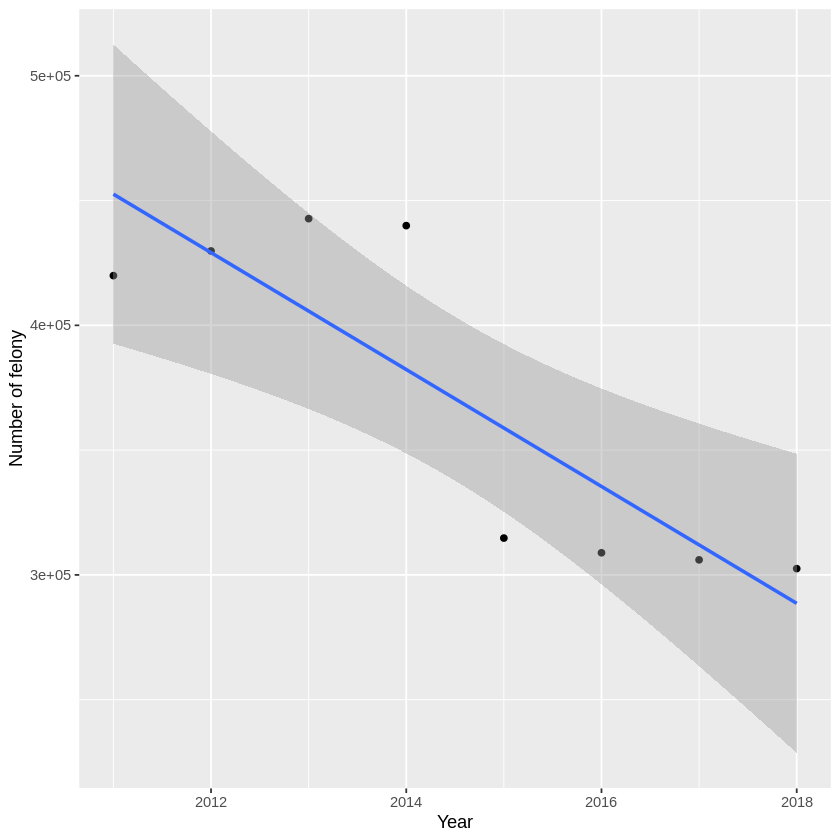

In [6]:
plot21<-ggplot(datapnyear,aes(YEAR,totalm))+ geom_point() + geom_smooth(method = "lm")+
    xlab("Year")+
    ylab("Number of misdemeanor")
plot21
plot22<-ggplot(datapnyear,aes(YEAR,totalf))+ geom_point() + geom_smooth(method = "lm")+
    xlab("Year")+
    ylab("Number of felony")
plot22

Warning message:
“'newdata' had 2 rows but variables found have 4 rows”Warning message:
“'newdata' had 2 rows but variables found have 4 rows”

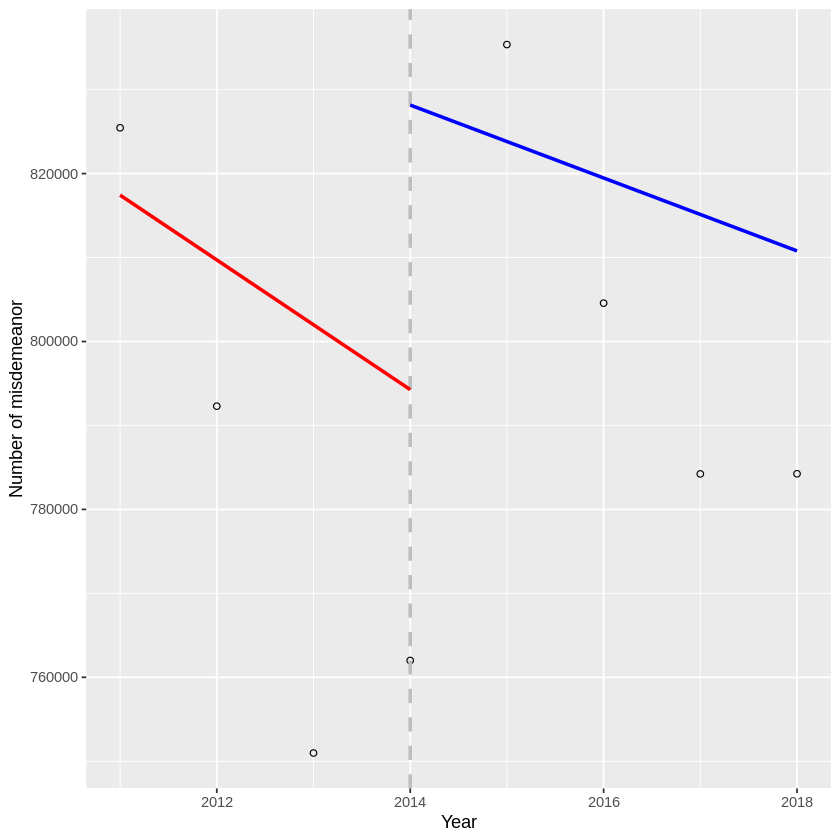

In [7]:
plotmrd<-ggplot(datapnyear, aes(x = YEAR, y = totalm)) + 
    geom_point(shape = 21) + 
    scale_color_brewer(NULL, type = 'qual', palette = 6) + 
    geom_vline(aes(xintercept = 2014), color = 'grey', size = 1, linetype = 'dashed') + 
    geom_segment(data = data.frame(t(predict(lm0, data.frame(V1 = c(2010, 2014))))), 
                 aes(x = 2011, xend = 2014, y = X1, yend = X2), color = 'red', size = 1) + 
    geom_segment(data = data.frame(t(predict(lm01, data.frame(V1 = c(2014, 2018) )))), 
                 aes(x = 2014, xend = 2018, y = X1, yend = X2), color = 'blue', size = 1)+
    xlab("Year")+
    ylab("Number of misdemeanor")
plotmrd

Warning message:
“'newdata' had 2 rows but variables found have 4 rows”Warning message:
“'newdata' had 2 rows but variables found have 4 rows”

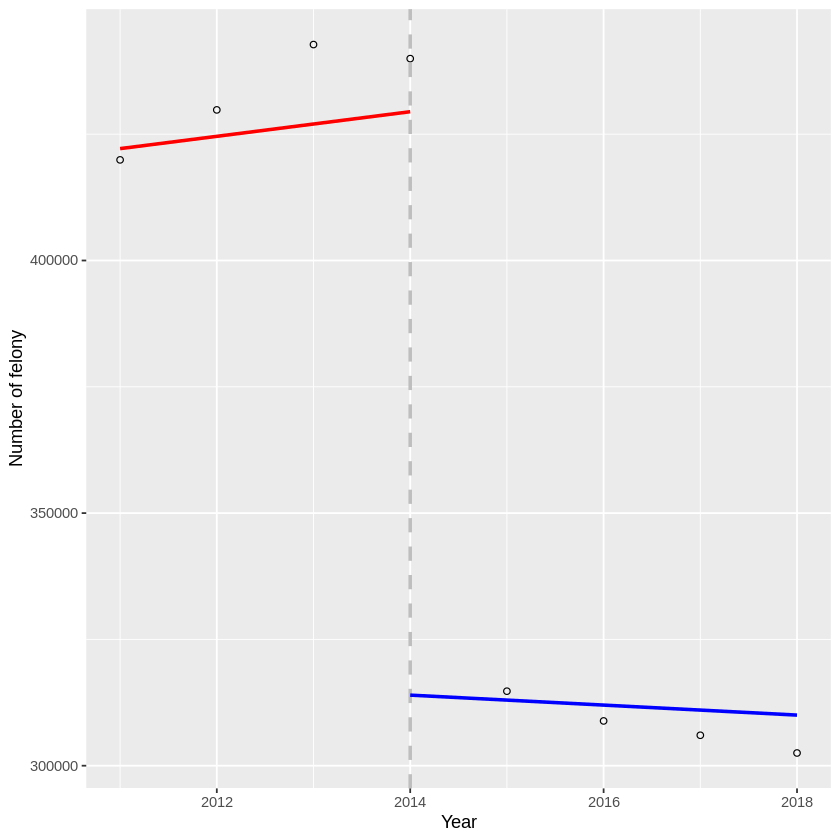

In [8]:
plotfrd<-ggplot(datapnyear, aes(x = YEAR, y = totalf)) + 
    geom_point(shape = 21) + 
    scale_color_brewer(NULL, type = 'qual', palette = 6) + 
    geom_vline(aes(xintercept = 2014), color = 'grey', size = 1, linetype = 'dashed') + 
    geom_segment(data = data.frame(t(predict(lm1, data.frame(V1 = c(2010, 2014))))), 
                 aes(x = 2011, xend = 2014, y = X1, yend = X2), color = 'red', size = 1) + 
    geom_segment(data = data.frame(t(predict(lm11, data.frame(V1 = c(2014, 2018) )))), 
                 aes(x = 2014, xend = 2018, y = X1, yend = X2), color = 'blue', size = 1)+
    xlab("Year")+
    ylab("Number of felony")
plotfrd

In [20]:
dataage<-datap %>% group_by(AGE_GROUP,YEAR)
dataage1<-dataage %>% summarise(totalm = sum(M_TOTAL),totalf = sum(F_TOTAL))

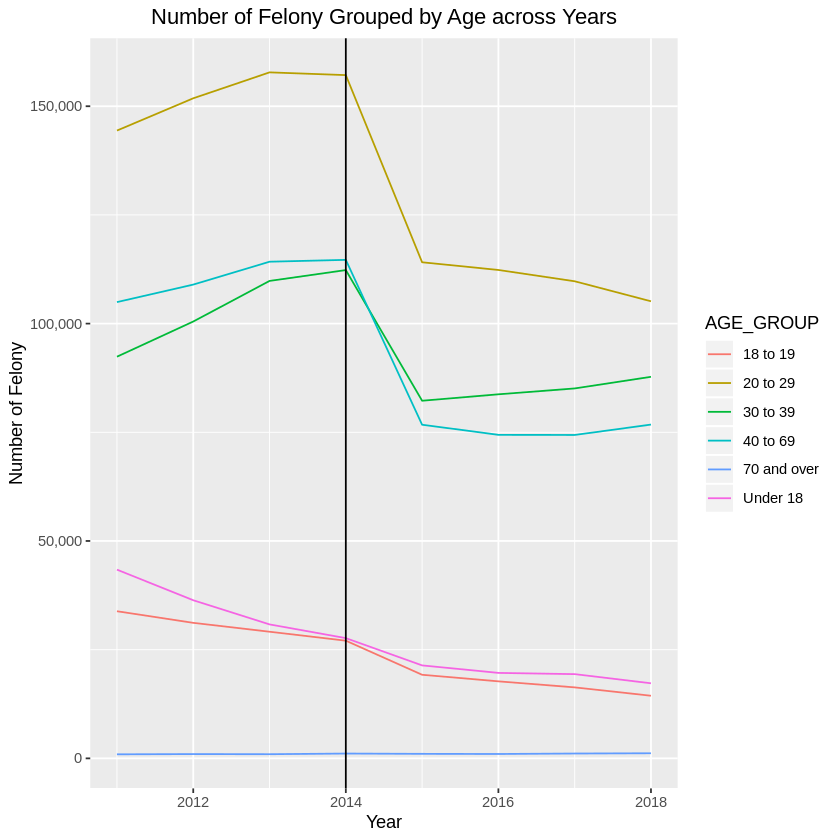

In [21]:
u = ggplot() +
    geom_line(data = dataage1, aes(x = YEAR, y = totalf ,group= AGE_GROUP, colour = AGE_GROUP)) +
    ggtitle("Number of Felony Grouped by Age across Years") +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_vline(xintercept = 2014) +
    xlab('Year') +
    ylab ('Number of Felony')
require(scales)
u + scale_y_continuous(labels = comma)

In [26]:
datagender<-datap %>% group_by(GENDER)
datagender1<-datagender %>% summarise(totalm = sum(M_TOTAL),totalf = sum(F_TOTAL))
datagender1

GENDER,totalm,totalf
<chr>,<dbl>,<dbl>
Female,1581565,623343
Male,4757590,2341223
